In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
from keras.models import load_model

model = load_model('DP_first_model.h5')
model.summary()

Using TensorFlow backend.
W0708 11:59:53.040372 140331183343360 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 11:59:53.066081 140331183343360 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 11:59:53.085681 140331183343360 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0708 11:59:53.195097 140331183343360 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_de

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 296, 56, 32)       832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 28, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 26, 32)       9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 5, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11200)             0         
__________

In [3]:
info_d = []
info_s = []
data_d = []
data_s = []

for i in range(0,1):
    name_dd = "../data/Tau05to15PeV_00{0}_data.npy".format(i)
    name_di = "../data/Tau05to15PeV_00{0}_info.pkl".format(i)
    name_sd = "../data/Electron05to15PeV_00{0}_data.npy".format(i)
    name_si = "../data/Electron05to15PeV_00{0}_info.pkl".format(i)
    info_d_temp = pickle.load(open(name_di, "rb"))
    info_s_temp = pickle.load(open(name_si, "rb"))
    data_d_temp = np.load(name_dd ,allow_pickle=True,encoding='bytes')
    data_s_temp = np.load(name_sd ,allow_pickle=True,encoding='bytes')
    info_d = info_d + info_d_temp
    info_s = info_s + info_s_temp
    data_d.append(data_d_temp)    
    data_s.append(data_s_temp)
data_d = np.vstack(data_d)
data_s = np.vstack(data_s)
info_d = np.array(info_d)
info_s = np.array(info_s)

In [4]:
print(info_d.shape, data_d.shape)
print(info_s.shape, data_s.shape)
print(type(data_d_temp[0][0][0]))

(985,) (985, 300, 60)
(2367,) (2367, 300, 60)
<class 'numpy.float64'>


In [5]:
label_d = np.ones(len(data_d))
label_s = np.zeros(len(data_s))
print(label_d.shape)
print(label_s.shape)
print(label_d[0])
print(label_s[0])

(985,)
(2367,)
1.0
0.0


(3352, 300, 60)
(3352,)
1.0


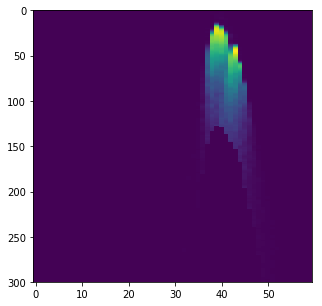

In [6]:
data = np.concatenate((data_d, data_s), axis = 0) 
label = np.concatenate((label_d, label_s), axis = 0) 
print(data.shape)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.imshow(data[2], interpolation='nearest', aspect='auto', cmap= 'viridis')
print(label.shape)
print(label[2])

In [7]:
data = data.reshape((len(data),300,60,1))
data = data.astype('float32')/10**-8

(1, 300, 60, 1)


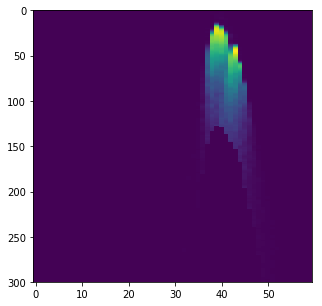

In [9]:
tensor = data[2:3]
print(tensor.shape)
im = tensor.reshape(300,60)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(im, interpolation='nearest', aspect='auto', cmap= 'viridis')

In [10]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:6]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [11]:
activations = activation_model.predict(tensor)

In [12]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 296, 56, 32)


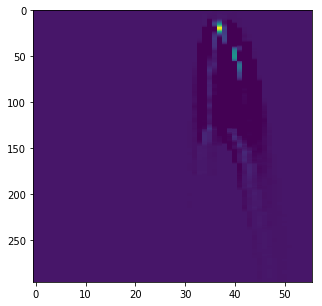

In [14]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(first_layer_activation[0, :, :, 0], interpolation='nearest', aspect='auto', cmap= 'viridis')
plt.show()

['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3']
conv2d_1 (1, 296, 56, 32)
max_pooling2d_1 (1, 148, 28, 32)
conv2d_2 (1, 146, 26, 32)
max_pooling2d_2 (1, 73, 13, 32)
conv2d_3 (1, 71, 11, 64)
max_pooling2d_3 (1, 35, 5, 64)


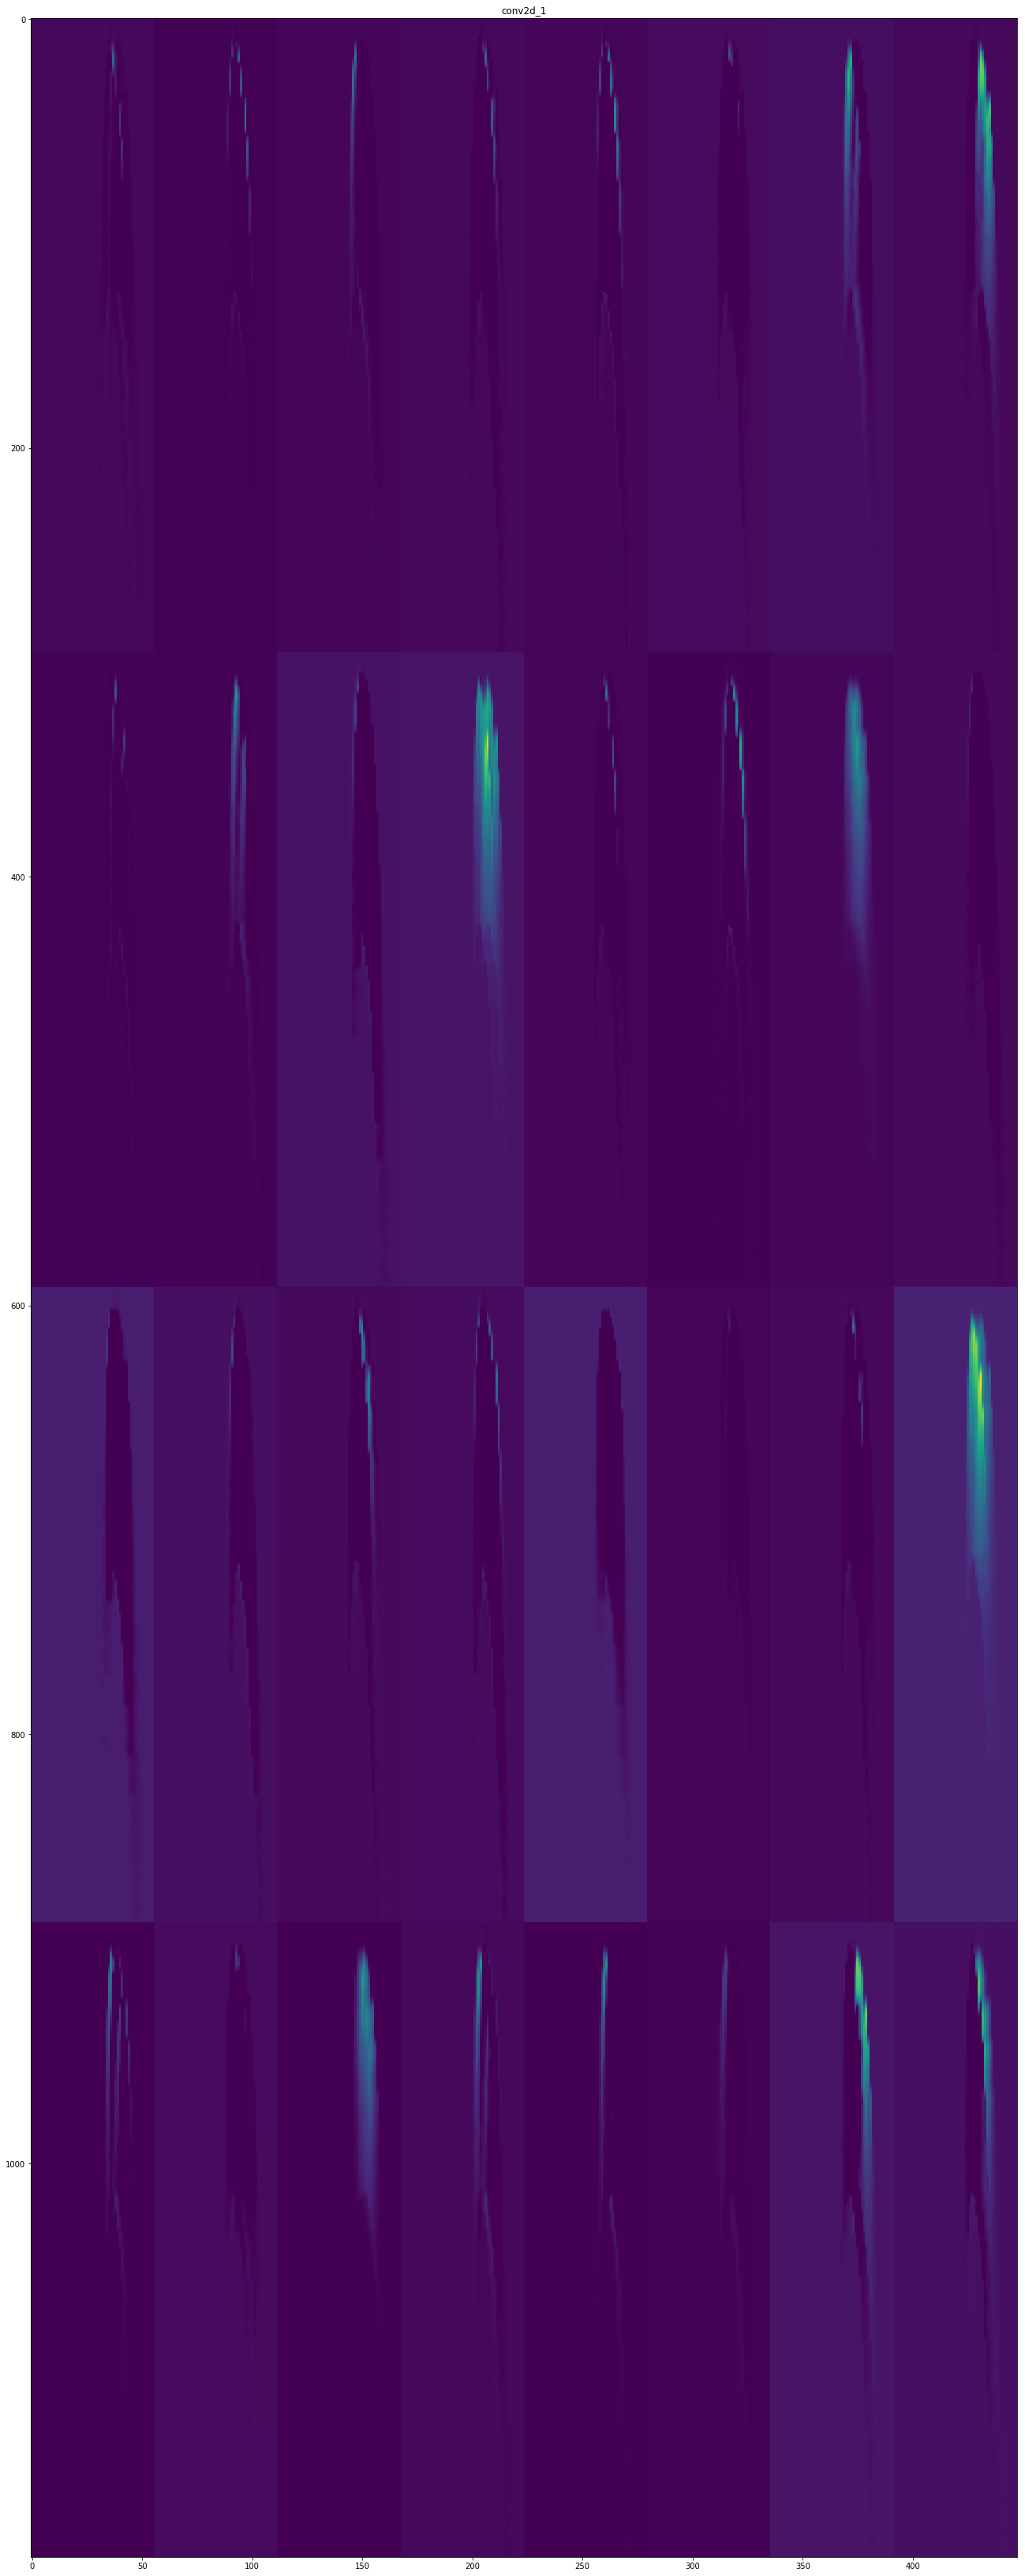

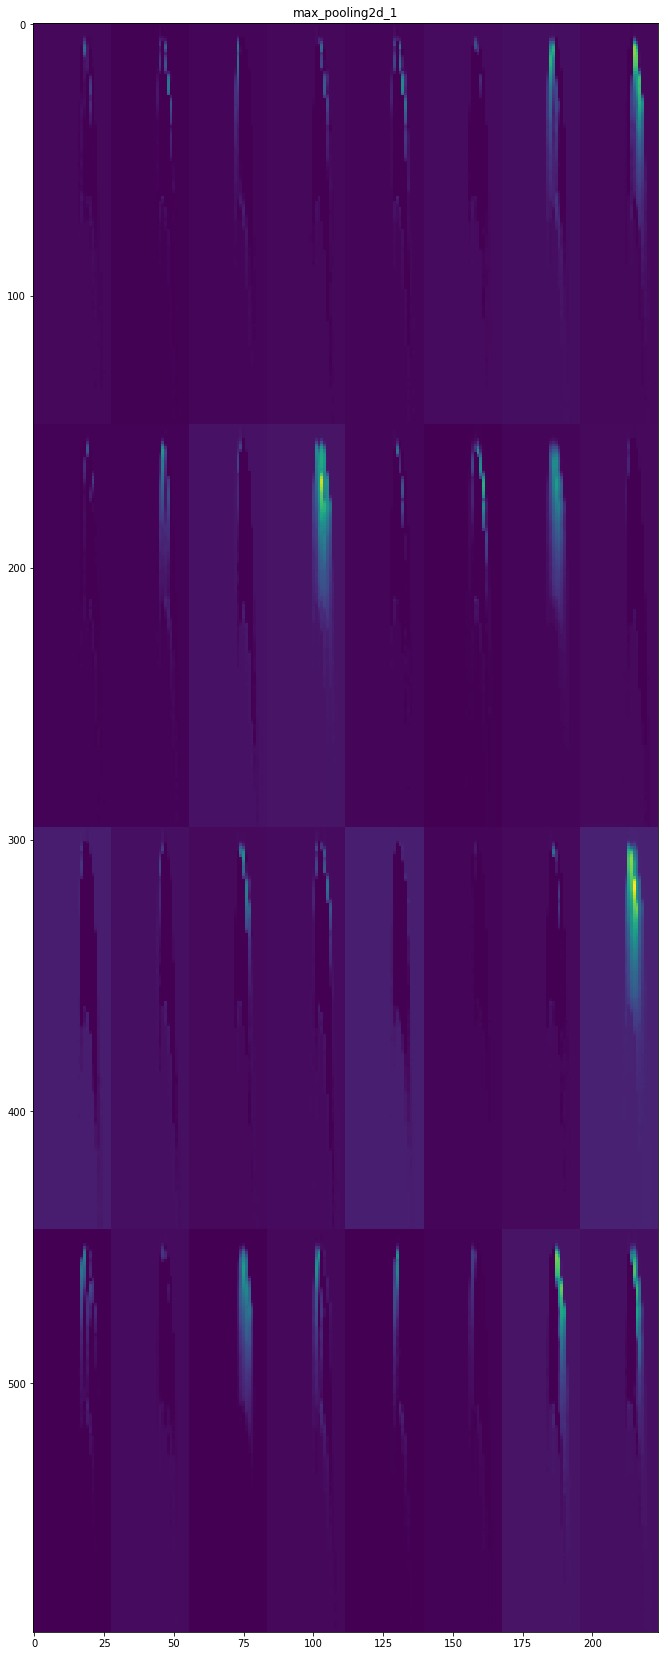

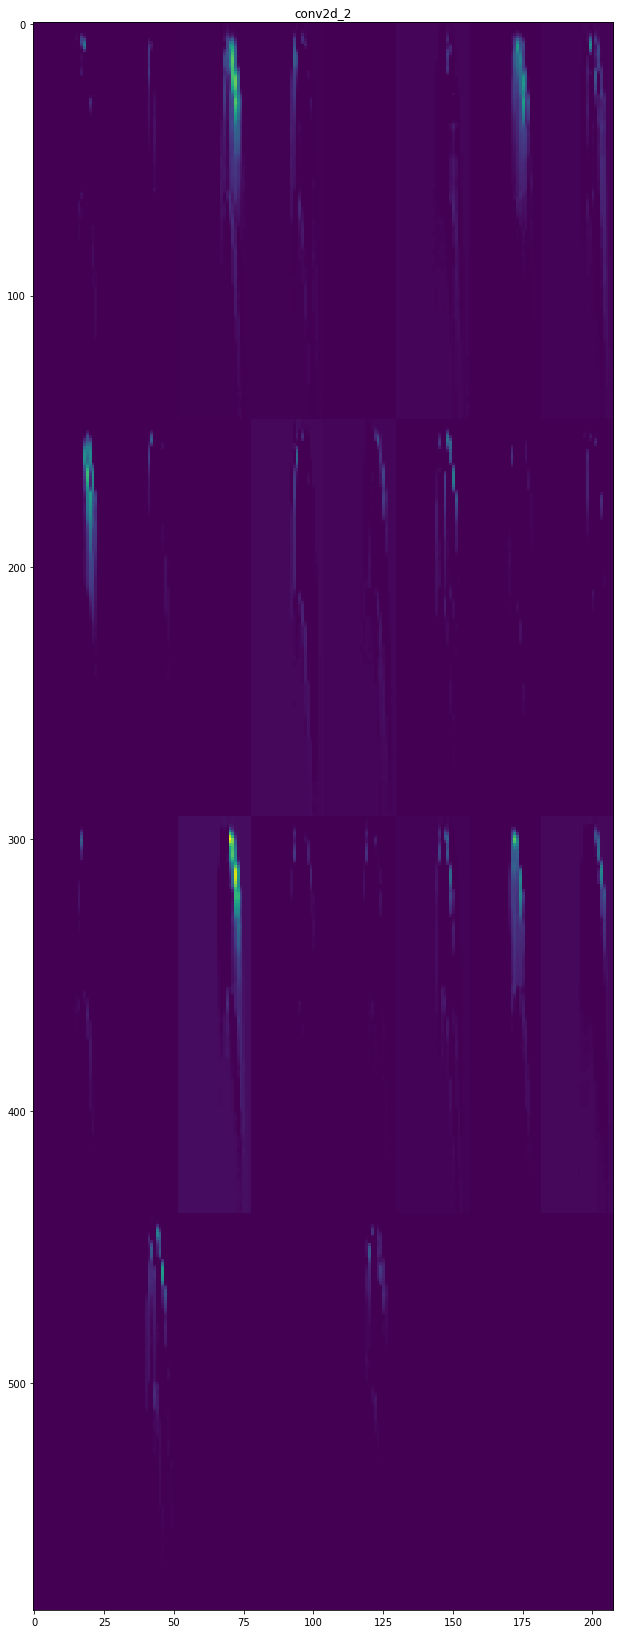

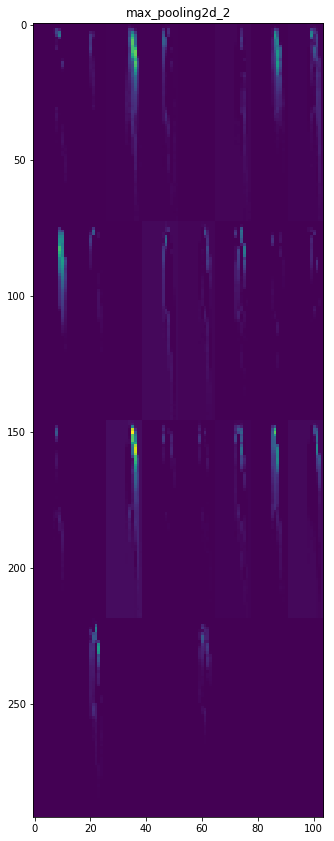

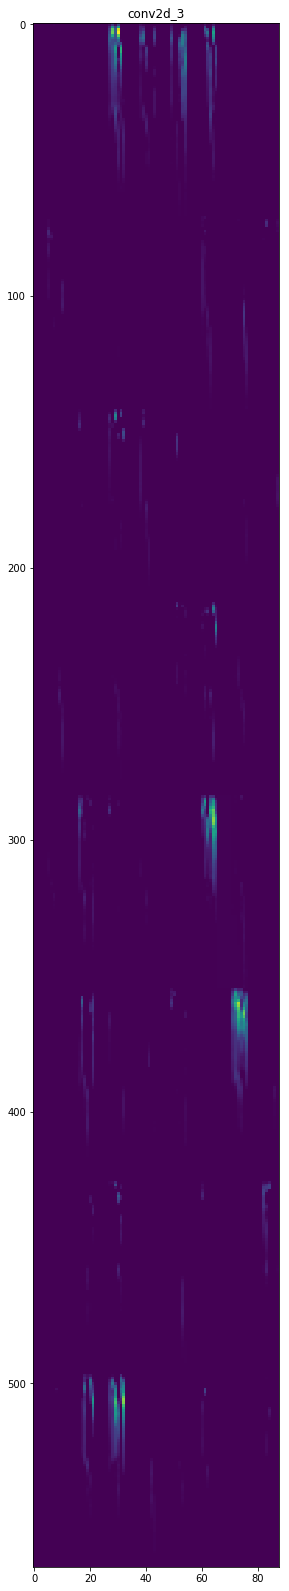

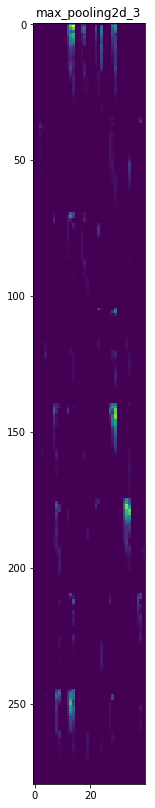

In [16]:
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)
print(layer_names)
images_per_row = 8

for layer_name, layer_activation in zip(layer_names, activations):
    print(layer_name, layer_activation.shape)
    
# The feature map has shape (1, size1, size2, n_features)
    n_features = layer_activation.shape[-1]
    size1 = layer_activation.shape[1]
    size2 = layer_activation.shape[2]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size1 * n_cols, images_per_row * size2))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            #channel_image -= channel_image.mean()
            #channel_image /= channel_image.std()
            #channel_image *= 64
            #channel_image += 128
            #channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size1 : (col + 1) * size1,
                         row * size2 : (row + 1) * size2] = channel_image

    # Display the grid
    scale = 1. / 20
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [17]:
preds = model.predict(data[2:3])
print('Predicted:', preds)

Predicted: [[0.83954173]]


In [58]:
from keras import backend as K

In [64]:
dp = model.output()
print(dp)

TypeError: 'Tensor' object is not callable